Trabalho Avaliativo AV2 - Árvores Binárias e Balanceamento

Aluno: Arthur

Data de entrega: 29/11/2025

Implementação de Árvore Rubro-Negra em Python
Operações: Inserção, Balanceamento, Percurso in-order
Regras: uso de nó NIL preto para filhos nulos


In [1]:
class Node:
    def __init__(self, key, color="RED", left=None, right=None, parent=None):
        self.key = key
        self.color = color
        self.left = left
        self.right = right
        self.parent = parent

# Nó NIL global (sempre preto), usado para representar filhos nulos
NIL = Node(key=None, color="BLACK")
NIL.left = NIL
NIL.right = NIL

In [2]:
class RedBlackTree:
    def __init__(self):
        self.root = NIL

    def insert(self, key):
        new_node = Node(key=key, color="RED", left=NIL, right=NIL, parent=None)
        parent = None
        current = self.root
        while current != NIL:
            parent = current
            if new_node.key < current.key:
                current = current.left
            else:
                current = current.right
        new_node.parent = parent
        if parent is None:
            self.root = new_node
        elif new_node.key < parent.key:
            parent.left = new_node
        else:
            parent.right = new_node
        self.insert_fix(new_node)

    def insert_fix(self, node):
        while node.parent and node.parent.color == "RED":
            if node.parent == node.parent.parent.left:
                uncle = node.parent.parent.right
                if uncle.color == "RED":
                    node.parent.color = "BLACK"
                    uncle.color = "BLACK"
                    node.parent.parent.color = "RED"
                    node = node.parent.parent
                else:
                    if node == node.parent.right:
                        node = node.parent
                        self.rotate_left(node)
                    node.parent.color = "BLACK"
                    node.parent.parent.color = "RED"
                    self.rotate_right(node.parent.parent)
            else:
                uncle = node.parent.parent.left
                if uncle.color == "RED":
                    node.parent.color = "BLACK"
                    uncle.color = "BLACK"
                    node.parent.parent.color = "RED"
                    node = node.parent.parent
                else:
                    if node == node.parent.left:
                        node = node.parent
                        self.rotate_right(node)
                    node.parent.color = "BLACK"
                    node.parent.parent.color = "RED"
                    self.rotate_left(node.parent.parent)
        self.root.color = "BLACK"

    def rotate_left(self, x):
        y = x.right
        x.right = y.left
        if y.left != NIL:
            y.left.parent = x
        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def rotate_right(self, x):
        y = x.left
        x.left = y.right
        if y.right != NIL:
            y.right.parent = x
        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.right:
            x.parent.right = y
        else:
            x.parent.left = y
        y.right = x
        x.parent = y

    def inorder(self, node):
        if node != NIL:
            self.inorder(node.left)
            print(f"{node.key} ({node.color})", end=" ")
            self.inorder(node.right)

In [3]:
# Criar árvore Rubro-Negra
tree = RedBlackTree()

# Inserir 21 valores
valores = [10, 20, 30, 15, 25, 5, 1, 50, 60, 70, 80, 90, 100,
           110, 120, 130, 140, 150, 160, 170, 180, 190]

for v in valores:
    tree.insert(v)

# Mostrar percurso in-order com cores
print("Árvore Rubro-Negra (in-order):")
tree.inorder(tree.root)

Árvore Rubro-Negra (in-order):
1 (RED) 5 (BLACK) 10 (BLACK) 15 (BLACK) 20 (RED) 25 (BLACK) 30 (BLACK) 50 (BLACK) 60 (BLACK) 70 (BLACK) 80 (BLACK) 90 (BLACK) 100 (RED) 110 (BLACK) 120 (RED) 130 (BLACK) 140 (BLACK) 150 (BLACK) 160 (RED) 170 (RED) 180 (BLACK) 190 (RED) 

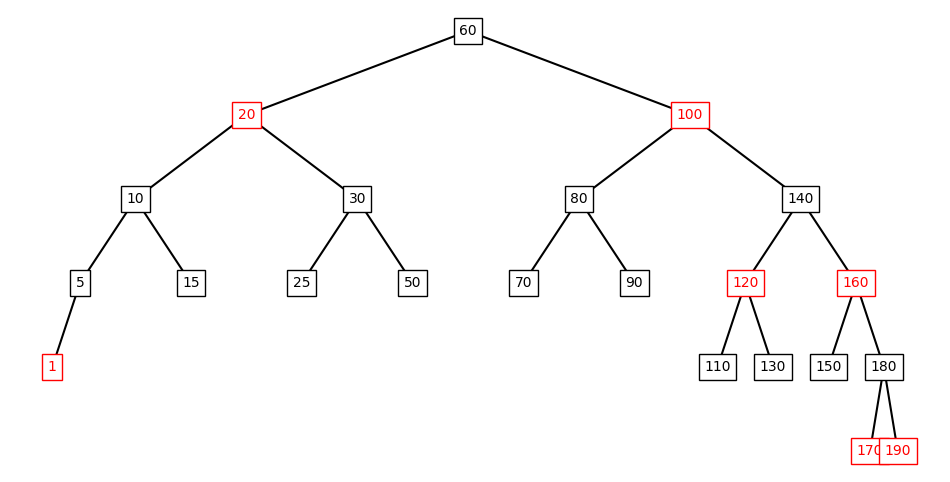

In [4]:
import matplotlib.pyplot as plt

def desenhar_rubro_negra(node, x=0, y=0, dx=10, dy=10, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12,6))
    
    if node.key is None:  # Nó NIL
        return ax
    
    # Cor do nó
    cor = 'red' if node.color == "RED" else 'black'
    
    # Desenha o nó
    ax.text(x, y, str(node.key), ha='center', va='center',
            bbox=dict(facecolor='white', edgecolor=cor), color=cor)
    
    # Desenha filhos
    if node.left and node.left.key is not None:
        child_x = x - dx
        child_y = y - dy
        ax.plot([x, child_x], [y, child_y], 'k-')
        desenhar_rubro_negra(node.left, child_x, child_y, dx/2, dy, ax)
    
    if node.right and node.right.key is not None:
        child_x = x + dx
        child_y = y - dy
        ax.plot([x, child_x], [y, child_y], 'k-')
        desenhar_rubro_negra(node.right, child_x, child_y, dx/2, dy, ax)
    
    return ax

# Exemplo: desenhar a árvore após inserções
ax = desenhar_rubro_negra(tree.root)
plt.axis('off')
plt.show()